#### Problem statement

Bệnh tim mạch (CVD) là do các rối loạn của tim và mạch máu.

Các nguyên nhân chính của bệnh tim mạch là sử dụng thuốc lá, thiếu hoạt động thể lực, chế độ ăn uống không lành mạnh và sử dụng rượu-bia ở mức độ nguy hại.

Vì vậy, hầu hết các bệnh tim mạch có thể phòng ngừa được bằng cách giải quyết các yếu tố nguy cơ hành vi này.

Việc chẩn đoán sớm và điều trị hiệu quả có thể giúp cải thiện đáng kể tỷ lệ sống sót và chất lượng cuộc sống của bệnh nhân.

Áp dụng học máy để xây dựng mô hình chẩn đoán bệnh.

#### Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.linalg
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report, roc_auc_score
from collections import Counter

sns.set()


#### Explore data

In [ ]:
link = 'https://drive.google.com/file/d/1LNodqO4eUw70SBPKt5CZfe5FRpyzZvE2/view?usp=drive_link'
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
df = pd.read_csv(path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [ ]:
df = df.rename(columns={'num': 'target'})

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [ ]:
print(df['target'].unique())

[0 2 1 3 4]


Biến "mục tiêu" đề cập đến sự hiện diện của bệnh tim ở bệnh nhân.
Nó là số nguyên có giá trị từ 0 đến 4.
Các thử nghiệm với tập dữ liệu này tập trung vào việc phân biệt sự hiện diện (giá trị 1,2,3,4) với sự vắng mặt (giá trị 0) nên sẽ tiến hành xử lý các giá trị 1,2,3,4 thành 1.

In [ ]:
df['target'] = df['target'].replace([1, 2, 3, 4], 1)

In [ ]:
print(df['target'].unique())

[0 1]


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
print("missing_values_count:")
print(df.isnull().sum())

missing_values_count:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


In [ ]:
print(df['ca'].unique())
print(df['thal'].unique())

[ 0.  3.  2.  1. nan]
[ 6.  3.  7. nan]


In [ ]:
# Thay thế giá trị null bằng giá trị phổ biến nhất
print(df['ca'].mode()[0])
df['ca'] = df['ca'].fillna(df['ca'].mode()[0])
print(df['ca'].unique())

0.0
[0. 3. 2. 1.]


In [ ]:
print(df['thal'].mode()[0])
df['thal'] = df['thal'].fillna(df['thal'].mode()[0])
print(df['thal'].unique())

3.0
[6. 3. 7.]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [ ]:
for feature in df.columns:
    print(feature)
    print(df[feature].unique(),"\n")

age
[ 0.94872647  1.39200191 -1.93256387 -1.48928843  0.17299446  0.83790761
  0.28381332 -0.15946212 -1.15683185 -0.27028098 -0.71355642 -0.04864326
 -0.60273756  1.05954533  0.39463218  0.61626989 -0.4919187   1.28118305
 -1.26765071 -1.60010729  1.61363963  0.50545103 -1.37846957  0.0621756
  0.72708875  1.17036419  1.83527735 -0.38109984 -0.93519414 -1.04601299
 -1.71092615  1.50282077 -0.82437528 -2.26502045 -2.15420159 -2.81911474
  1.72445849  2.5001905  -1.82174501  2.16773392  2.38937164] 

sex
[1 0] 

cp
[1 4 3 2] 

trestbps
[ 0.75752504  1.61121989 -0.6652997  -0.0961698   0.47296009  2.29417576
  1.04208999 -1.2344296   0.01765618 -0.83603867  0.18839514 -1.12060362
 -1.51899455 -0.43764774 -0.38073475  0.58678607 -0.20999578  2.18034978
  1.32665494 -1.57590754  2.74947968  0.35913411 -1.34825558  0.13148215
 -0.55147372 -0.94986465 -0.77912568 -1.80355949  3.88773947 -2.14503743
  1.89578483 -1.68973352  1.15591597 -1.7466465  -0.32382176  2.40800174
  0.92826401  2.63565

In [ ]:
categorical_data = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_data = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [ ]:
df[numerical_data].describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,-1.465641e-18,1.001654,-2.819115,-0.713556,0.172994,0.727089,2.500191
trestbps,303.0,4.426236e-16,1.001654,-2.145037,-0.665300,-0.096170,0.472960,3.887739
chol,303.0,2.345026e-16,1.001654,-2.334877,-0.690503,-0.110136,0.547614,6.138485
thalach,303.0,-1.172513e-16,1.001654,-3.442067,-0.705307,0.148562,0.717808,2.294182
oldpeak,303.0,2.345026e-17,1.001654,-0.896862,-0.896862,-0.206705,0.483451,4.451851


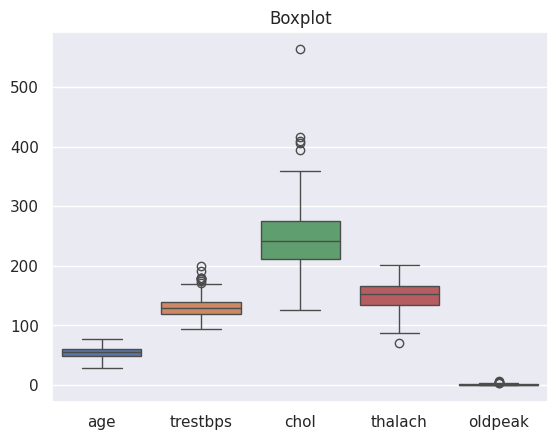

In [ ]:
sns.boxplot(df[numerical_data])
plt.title('Boxplot')
plt.show()

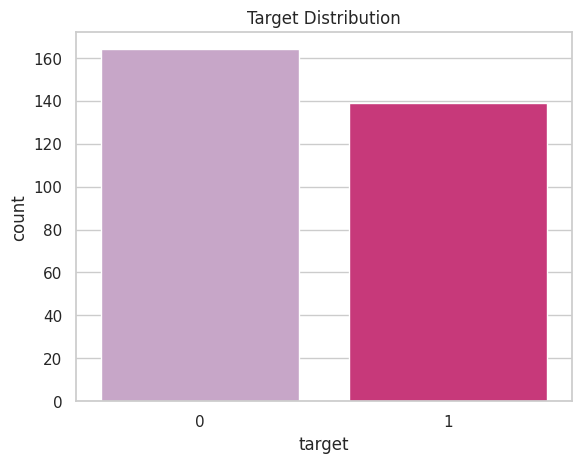

In [ ]:
# the distributaion of Target variable.
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='PuRd')
plt.title('Target Distribution');

In [ ]:
# Calculate and print the percentage of people with and without Heart Disease
print(f"The percentage of people with Heart Disease: {df['target'].value_counts(normalize=True)[1] * 100:.2f}%")
print(f"The percentage of people without Heart Disease: {df['target'].value_counts(normalize=True)[0] * 100:.2f}%")

The percentage of people with Heart Disease: 45.87%
The percentage of people without Heart Disease: 54.13%


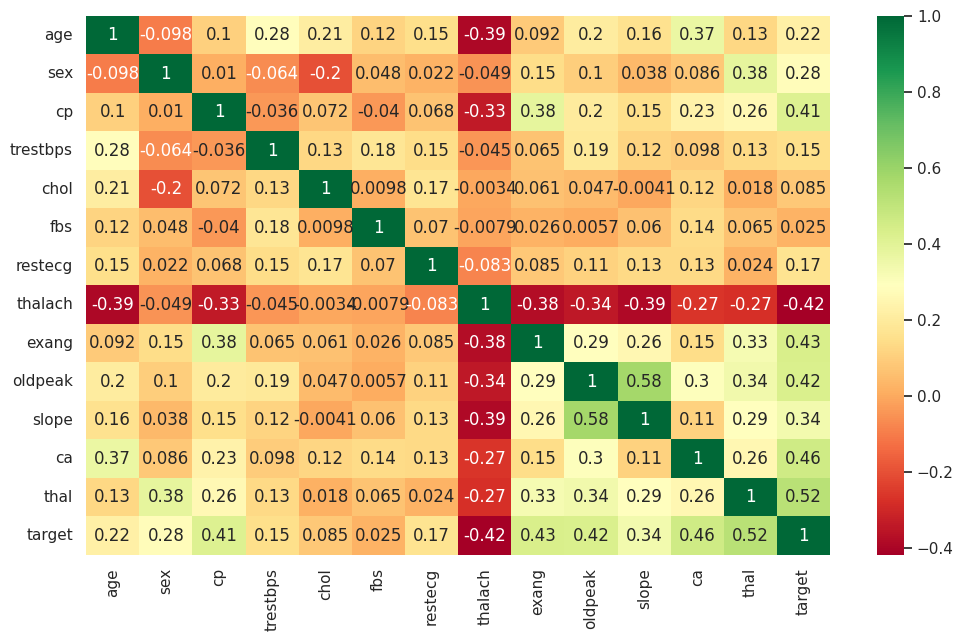

In [ ]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,7))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

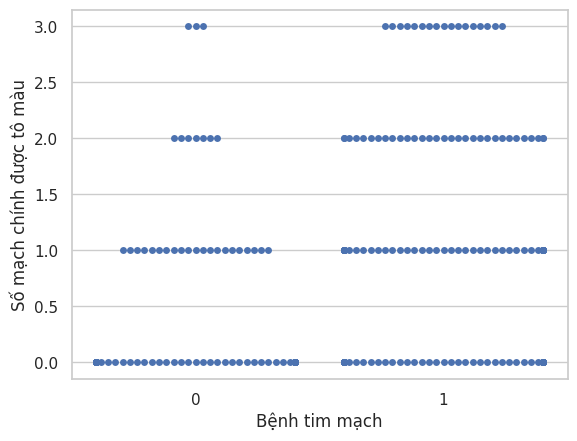

In [ ]:
sns.swarmplot(x = 'target', y = 'ca', data = df)
plt.xlabel('Bệnh tim mạch')
plt.ylabel('Số mạch chính được tô màu')
plt.show()

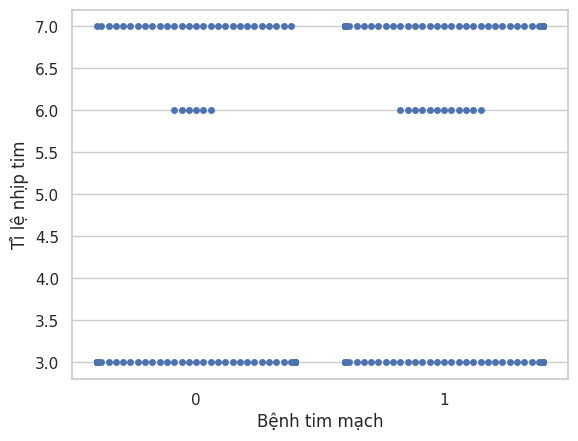

In [ ]:
sns.swarmplot(x = 'target', y = 'thal', data = df)
plt.xlabel('Bệnh tim mạch')
plt.ylabel('Tỉ lệ nhịp tim')
plt.show()

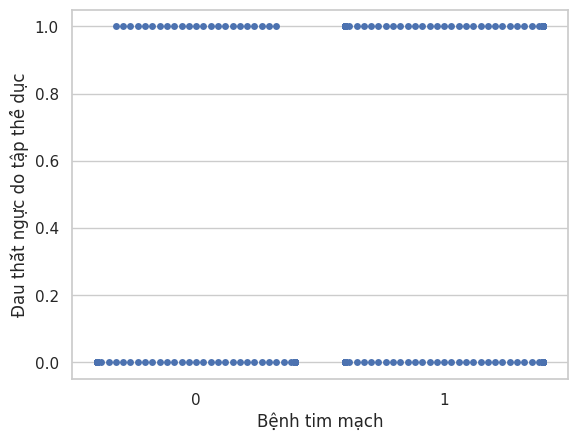

In [ ]:
sns.swarmplot(x = 'target', y = 'exang', data = df)
plt.xlabel('Bệnh tim mạch')
plt.ylabel('Đau thắt ngực do tập thể dục')
plt.show()

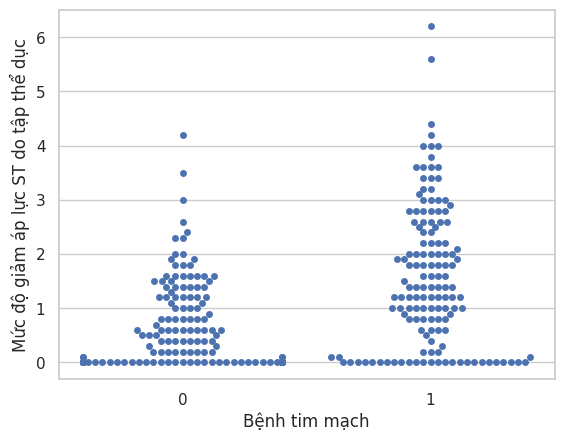

In [ ]:
sns.swarmplot(x = 'target', y = 'oldpeak', data = df)
plt.xlabel('Bệnh tim mạch')
plt.ylabel('Mức độ giảm áp lực ST do tập thể dục')
plt.show()

Oldpeak thường được đo bằng mm (milimét) và có thể là một trong các đặc trưng quan trọng để đánh giá phản ứng của tim mạch trong quá trình tăng cường vận động. Sự tăng cao của oldpeak có thể liên quan đến sự suy giảm của tuần hoàn máu trong tim, và thường được coi là một dấu hiệu bất thường trong quá trình cung cấp oxy cho tim mạch, có thể liên quan đến bệnh tim mạch.

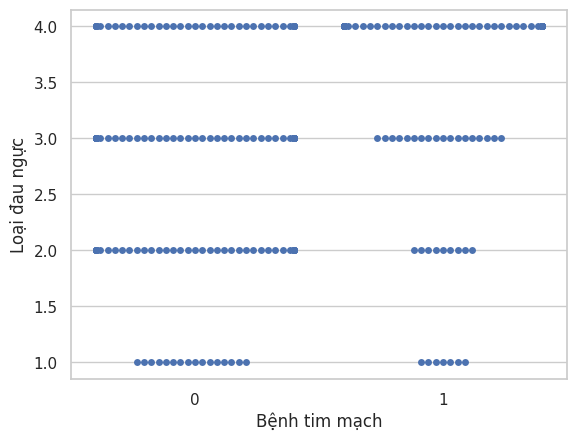

In [ ]:
sns.swarmplot(x = 'target', y = 'cp', data = df)
plt.xlabel('Bệnh tim mạch')
plt.ylabel('Loại đau ngực')
plt.show()

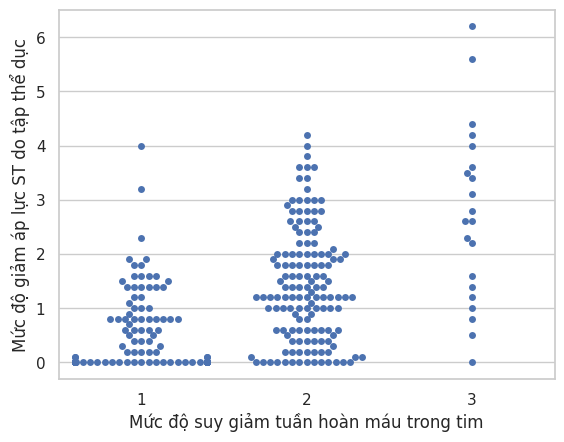

In [ ]:
sns.swarmplot(x = 'slope', y = 'oldpeak', data = df)
plt.xlabel('Mức độ suy giảm tuần hoàn máu trong tim')
plt.ylabel('Mức độ giảm áp lực ST do tập thể dục')
plt.show()

#### Data processing

In [ ]:
# numerical_data = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
standardScaler = StandardScaler()
df[numerical_data] = standardScaler.fit_transform(df[numerical_data])

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.948726,1,1,0.757525,-0.264900,1,2,0.017197,0,1.087338,3,0.0,6.0,0
1,1.392002,1,4,1.611220,0.760415,0,2,-1.821905,1,0.397182,2,3.0,3.0,1
2,1.392002,1,4,-0.665300,-0.342283,0,2,-0.902354,1,1.346147,2,2.0,7.0,1
3,-1.932564,1,3,-0.096170,0.063974,0,0,1.637359,0,2.122573,3,0.0,3.0,0
4,-1.489288,0,2,-0.096170,-0.825922,0,2,0.980537,0,0.310912,1,0.0,3.0,0


In [ ]:
X = df.drop('target',axis=1)
y = df['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
print(y_test.unique())
Counter(y_train)

[0 1]


Counter({0: 135, 1: 107})

#### Modeling

Logistic Regression

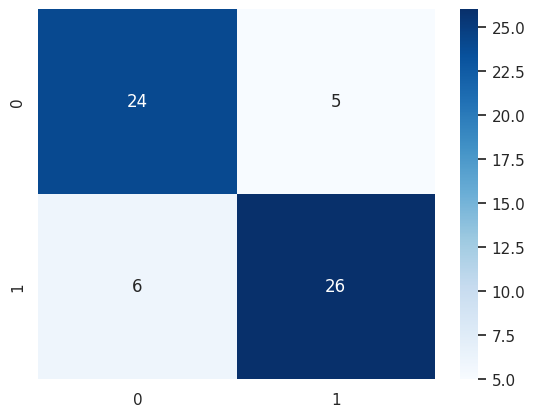

Accuracy of Logistic Regression: 81.9672131147541 

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

ROC AUC: 0.9127155172413793


In [ ]:
m1 = 'Logistic Regression'

lr = LogisticRegression(solver="liblinear",random_state=2)
model = lr.fit(X_train,y_train)

lr_predict = lr.predict(X_test)
lr_acc_score = accuracy_score(y_test,lr_predict)
lr_conf_matrix = confusion_matrix(y_test,lr_predict)

sns.heatmap(lr_conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.show()
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

# Tính ROC_AUC
y_scores_lr = model.predict_proba(X_test)[:, 1]
roc_auc_lr = roc_auc_score(y_test, y_scores_lr)
print('ROC AUC:', roc_auc_lr)

SVC

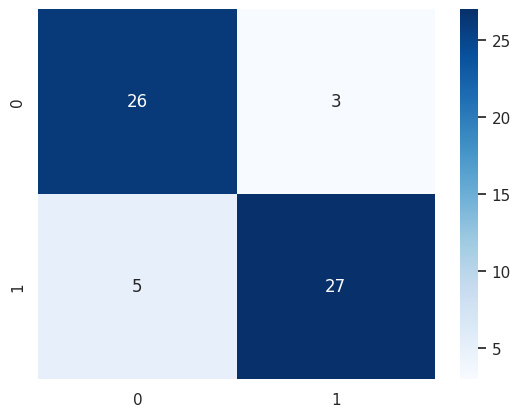

Accuracy of SVC: 86.88524590163934 

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

ROC AUC: 0.9364224137931035


In [ ]:
m2 = "SVC"
svc = SVC(C=5, kernel="rbf", probability=True)
model = svc.fit(X_train,y_train)

svc_predict = svc.predict(X_test)
svc_acc_score = accuracy_score(y_test,svc_predict)
svc_conf_matrix = confusion_matrix(y_test,svc_predict)

sns.heatmap(svc_conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.show()
print("Accuracy of SVC:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predict))

# Tính ROC_AUC
y_scores_svc = model.predict_proba(X_test)[:, 1]
roc_auc_svc = roc_auc_score(y_test,y_scores_svc)
print('ROC AUC:', roc_auc_svc)

GaussianNB

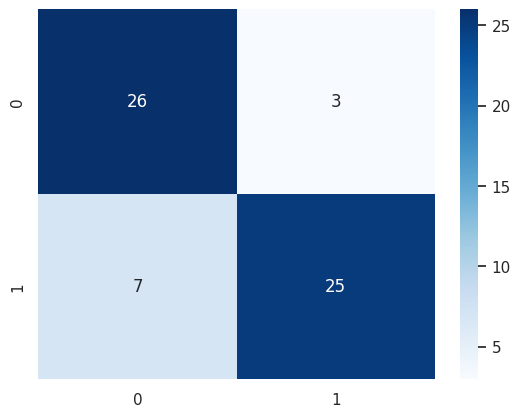

Accuracy of GaussianNB: 83.60655737704919 

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

ROC AUC: 0.9170258620689654


In [ ]:
m3 = "GaussianNB"
nb = GaussianNB()
model = nb.fit(X_train,y_train)

nb_predict = nb.predict(X_test)
nb_acc_score = accuracy_score(y_test,nb_predict)
nb_conf_matrix = confusion_matrix(y_test,nb_predict)

sns.heatmap(nb_conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.show()
print("Accuracy of GaussianNB:",nb_acc_score*100,'\n')
print(classification_report(y_test,nb_predict))

# Tính ROC_AUC
y_scores_nb = model.predict_proba(X_test)[:, 1]
roc_auc_nb = roc_auc_score(y_test,y_scores_nb)
print('ROC AUC:', roc_auc_nb)

Random Forest Classifier

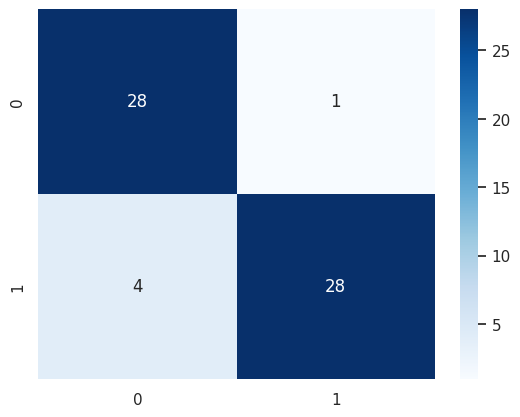

Accuracy of Random Forest: 91.80327868852459 

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        29
           1       0.97      0.88      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61

ROC AUC: 0.9504310344827587


In [ ]:
m4 = "Random Forest"
rf = RandomForestClassifier(n_estimators=100,criterion="entropy",max_depth=7,min_samples_leaf=2,max_features="sqrt",random_state=2)
model = rf.fit(X_train, y_train)

rf_predict = rf.predict(X_test)
rf_acc_score = accuracy_score(y_test,rf_predict)
rf_conf_matrix = confusion_matrix(y_test,rf_predict)

sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.show()
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predict))

# Tính ROC_AUC
y_scores_rf = model.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test,y_scores_rf)
print('ROC AUC:', roc_auc_rf)

Decision Tree

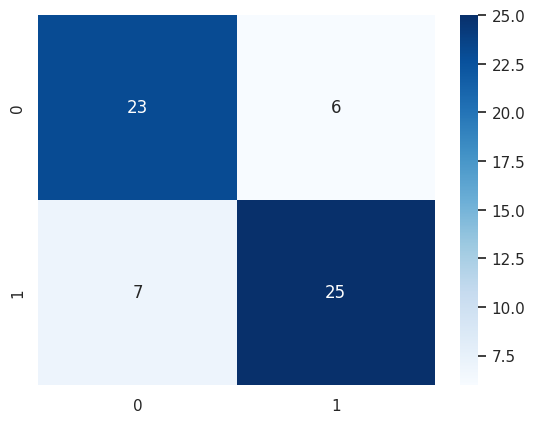

Accuracy of Decision Tree: 78.68852459016394 

              precision    recall  f1-score   support

           0       0.77      0.79      0.78        29
           1       0.81      0.78      0.79        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61

ROC AUC: 0.7931034482758621


In [ ]:
m5 = 'Decision Tree'
dt = DecisionTreeClassifier(criterion='entropy',random_state=2,max_depth=6)
model = dt.fit(X_train,y_train)

dt_predict = dt.predict(X_test)
dt_acc_score = accuracy_score(y_test,dt_predict)
dt_conf_matrix = confusion_matrix(y_test,dt_predict)

sns.heatmap(dt_conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.show()
print("Accuracy of Decision Tree:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predict))

# Tính ROC_AUC
dt_proba = dt.predict_proba(X_test)[:, 1]
roc_auc_dt = roc_auc_score(y_test, dt_proba)
print('ROC AUC:', roc_auc_dt)

XGBoost

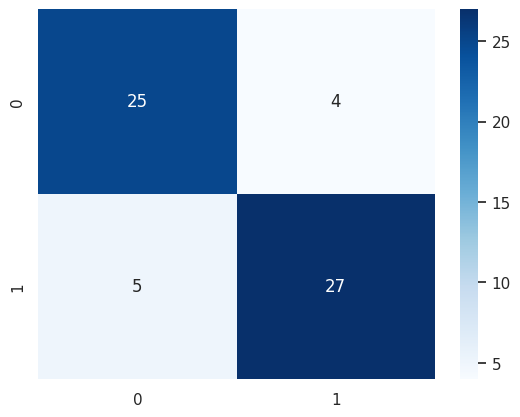

Accuracy of XGBoost: 85.24590163934425 

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

ROC AUC: 0.920258620689655


In [ ]:
m6 = "XGBoost"
xgb = XGBClassifier(use_label_encoder=False,eval_metric='logloss')
model = xgb.fit(X_train,y_train)

xgb_predict = xgb.predict(X_test)
xgb_acc_score = accuracy_score(y_test,xgb_predict)
xgb_conf_matrix = confusion_matrix(y_test,xgb_predict)

sns.heatmap(xgb_conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.show()
print("Accuracy of XGBoost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predict))

# Tính ROC_AUC
y_scores_xgb = model.predict_proba(X_test)[:, 1]
roc_auc_xgb = roc_auc_score(y_test,y_scores_xgb)
print('ROC AUC:', roc_auc_xgb)

Extreme Gradient Boosting

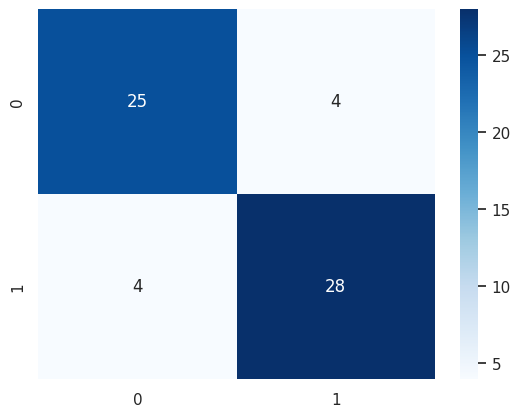

Accuracy of Extreme Gradient Boost: 86.88524590163934 

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

ROC AUC: 0.9331896551724138


In [ ]:
m7 = "Extreme Gradient Boost"
egb = GradientBoostingClassifier(n_estimators=100, subsample=0.2, min_samples_leaf=2, max_depth=5, random_state=2, max_features="sqrt")
model = egb.fit(X_train,y_train)

egb_predict = egb.predict(X_test)
egb_acc_score = accuracy_score(y_test,egb_predict)
egb_conf_matrix = confusion_matrix(y_test,egb_predict)

sns.heatmap(egb_conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.show()
print("Accuracy of Extreme Gradient Boost:",egb_acc_score*100,'\n')
print(classification_report(y_test,egb_predict))

# Tính ROC_AUC
y_scores_egb = model.predict_proba(X_test)[:, 1]
roc_auc_egb = roc_auc_score(y_test,y_scores_egb)
print('ROC AUC:', roc_auc_egb)

In [ ]:
results = {
    "Models": [m1, m2, m3, m4, m5, m6, m7],
    "Accuracy": [lr_acc_score, svc_acc_score, nb_acc_score, rf_acc_score, dt_acc_score, xgb_acc_score, egb_acc_score]
}

for (key, value) in results.items():
    if key=="Accuracy":
        results[key] = [item*100 for item in results[key]]

result_fn = pd.DataFrame(results)
result_fn = result_fn.sort_values(by="Accuracy", ascending=False)
result_fn

,Models,Accuracy
3,Random Forest,91.803279
1,SVC,86.885246
6,Extreme Gradient Boost,86.885246
5,XGBoost,85.245902
2,GaussianNB,83.606557
0,Logistic Regression,81.967213
4,Decision Tree,78.688525


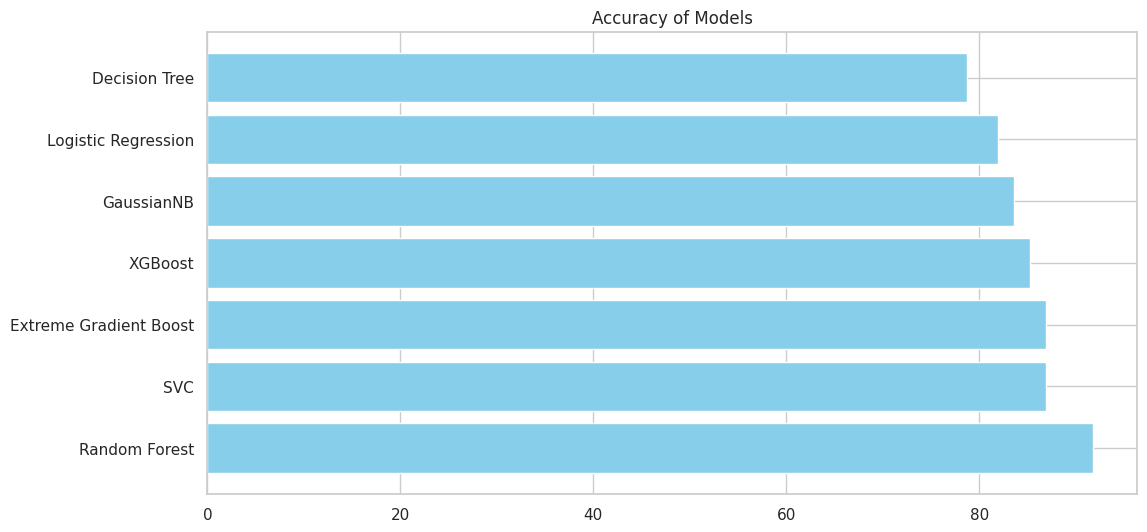

In [ ]:
df_results = pd.DataFrame(result_fn)

plt.figure(figsize=(12, 6))
plt.barh(df_results['Models'], df_results['Accuracy'], color='skyblue')
plt.title('Accuracy of Models')
plt.show()

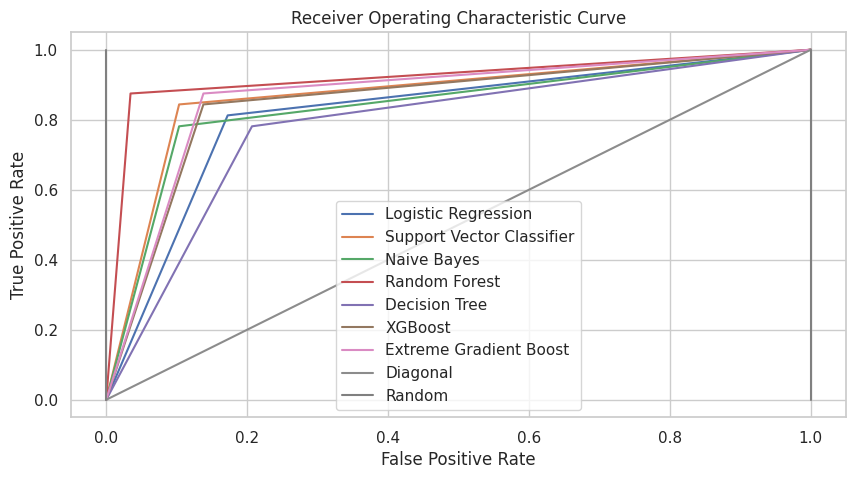

In [ ]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nb_predict)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predict)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predict)
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predict)
egb_false_positive_rate,egb_true_positive_rate,egb_threshold = roc_curve(y_test,egb_predict)

sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Receiver Operating Characteristic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Decision Tree')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='XGBoost')
plt.plot(egb_false_positive_rate,egb_true_positive_rate,label='Extreme Gradient Boost')

plt.plot([0,1],[0,1],label='Diagonal')
plt.plot([0,0],[1,0],c='.5',label='Random')
plt.plot([1,1],[0,1],c='.5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.legend()
plt.show()

-->Dựa vào các thông số độ chính xác và biểu đồ ROC, chúng ta chọn mô hình Random Forrest để có độ chính xác cao nhất. Ngoài ra , chúng ta còn lựa ra các thông số tốt nhất cho mô hình bằng RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint

# Định nghĩa mô hình
clf = RandomForestClassifier()

# Định nghĩa không gian tham số
param_dist = {
    'n_estimators': sp_randint(100, 500),
    'max_depth': [ 10, 20, 30, 40,50],
    'min_samples_split': sp_randint(2, 11),
    'min_samples_leaf': sp_randint(1, 5)
}

# Thiết lập Randomized Search CV
random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_dist, n_iter=150, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Huấn luyện mô hình với Randomized Search
random_search.fit(X_train, y_train)

# Kết quả tốt nhất
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


KeyboardInterrupt: 

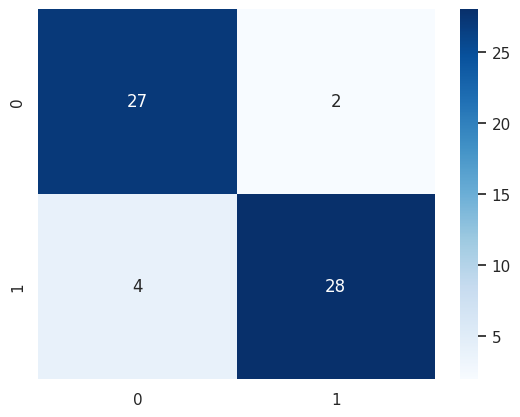

Accuracy of Random Forest: 91.80327868852459 

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        29
           1       0.97      0.88      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61

ROC AUC: 0.9331896551724138


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
#Huấn luyện mô hình với các tham số sau khi optimized
rf_optimized = RandomForestClassifier( n_estimators=447, max_depth=30, min_samples_split=8,min_samples_leaf=4)
rf_optimized.fit(X_train, y_train)

rf_op_predict = rf_optimized.predict(X_test)
rf_op_acc_score = accuracy_score(y_test, rf_op_predict)
rf_conf_matrix = confusion_matrix(y_test,rf_op_predict)

sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.show()
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predict))

# Tính ROC_AUC
y_scores_rf = model.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test,y_scores_rf)
print('ROC AUC:', roc_auc_rf)

Chạy thử nghiệm trên 1 New_data

In [ ]:
new_data=pd.read_csv("/content/new_data.csv")

In [ ]:
new_data.dropna(inplace=True)

In [ ]:
new_data.drop_duplicates(inplace=True)

In [ ]:
Temp_data = new_data.drop("target", axis=1)

In [ ]:
# @title
st = StandardScaler()
Temp_data[numerical_data] = st.fit_transform(Temp_data[numerical_data])

In [ ]:
p =rf_optimized.predict(Temp_data)
p

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1])

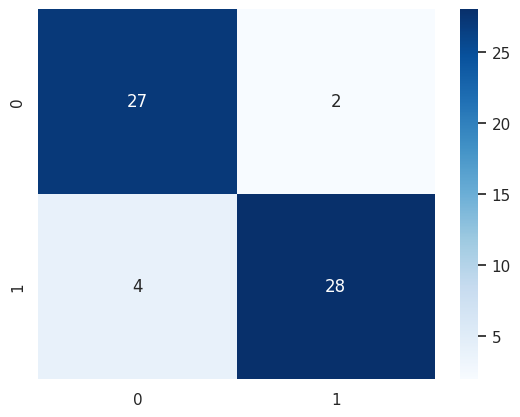

Accuracy: 93.28%
Confusion Matrix:
[[65  1]
 [ 7 46]]


In [ ]:
accuracy = accuracy_score(new_data['target'], p)
conf_matrix = confusion_matrix(new_data['target'], p)

sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.show()

print(f'Accuracy: {accuracy*100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)

In [ ]:
new_data=new_data.assign(predit=p)
new_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,predit
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0,0


In [ ]:
fitted = pd.DataFrame({'Actuals': new_data['target'], 'PredictedScores': new_data['predit']})
ones = fitted[fitted['Actuals'] == 1] # Subset ones
zeros = fitted[fitted['Actuals'] == 0] # Subset zeros

In [ ]:
print(len(ones), len(zeros))
totalPairs = len(ones) * len(zeros)
print("totalPairs", totalPairs)

53 66
totalPairs 3498


In [ ]:
conc = sum(ones['PredictedScores'].apply(lambda x: (x > zeros['PredictedScores']).sum()))
disc = sum(ones['PredictedScores'].apply(lambda x: (x < zeros['PredictedScores']).sum()))

In [ ]:
# Diagonal line
tied = sum(ones['PredictedScores'].apply(lambda x: (x == zeros['PredictedScores']).sum()))

In [ ]:
percent_concordance = conc / totalPairs
percent_discordance = disc / totalPairs
percent_tied = (tied / totalPairs) # percent_tied = (1 - percent_concordance - percent_discordance)
AUC = percent_concordance + 0.5 * percent_tied
Gini = 2 * AUC - 1

In [ ]:
percent_concordance

0.8547741566609491

Save Model Usign Joblib

In [ ]:
import joblib
joblib.dump(rf, "model_")